In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4824,3339-EAQNV,Male,1,Yes,No,72,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),97.25,7133.1,No
4915,2436-QBZFP,Female,0,Yes,Yes,22,No,No phone service,DSL,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,39.20,849.9,No
5412,3733-UOCWF,Male,1,Yes,No,61,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,One year,Yes,Bank transfer (automatic),85.55,5251.75,No
5055,6925-BAYGL,Female,1,Yes,No,53,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.10,1275.6,No
931,0454-OKRCT,Male,0,No,No,33,Yes,No,Fiber optic,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),80.60,2651.1,No


In [5]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
517400/df.shape[0]

73.46301292063042

In [7]:
df.drop('customerID',axis='columns',inplace=True)

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [11]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df.shape

(7043, 20)

In [13]:
df.iloc[488].TotalCharges

' '

In [14]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [15]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [16]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [18]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [19]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


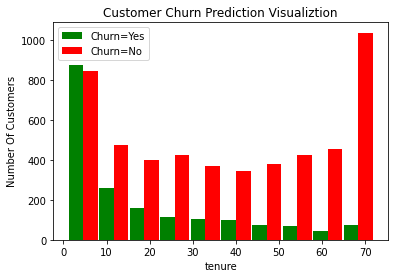

In [20]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

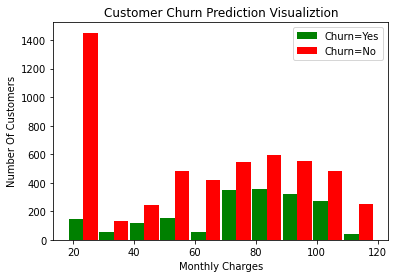

In [21]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [22]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [23]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [24]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [25]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Convert Yes and No to 1 or 0**

In [26]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [27]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [28]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [29]:
df1.gender.unique()

array([1, 0])

In [30]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [31]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4806,0,0,0,0,67,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3243,1,0,0,0,19,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
5213,1,1,1,0,17,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5921,1,0,0,0,27,1,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
5406,0,0,1,1,71,1,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [32]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [33]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [34]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [35]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [36]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [37]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [38]:
5163/1869

2.7624398073836276

In [39]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [40]:
X_train.shape

(5625, 26)

In [41]:
X_test.shape

(1407, 26)

In [42]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [43]:
len(X_train.columns)

26

In [44]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [45]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [46]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4917 - accuracy: 0.7579
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 0.7899
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.7977
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.7977
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4161 - accuracy: 0.7998
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4136 - accuracy: 0.8044
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4116 - accuracy: 0.8016
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4093 - accuracy: 0.8076
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4082 - accuracy: 0.8055
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4065 - accura

##Handling imbalanced data 
Four Methods to do it :
1. Undersampling
2. Oversampling
3. SMOTE
4. Use of Ensemble with undersampling

### Method 1: Undersampling

reference: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [47]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [48]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [49]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [50]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

**Printing Classification in the last, Scroll down till the last epoch to watch the classification report**

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Check classification report above. f1-score for minority class 1 improved from **0.57 to 0.76**. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

### Method2: Oversampling

In [52]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [53]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [54]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [55]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5408 - accuracy: 0.7378
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4959 - accuracy: 0.7584
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4921 - accuracy: 0.7600
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4861 - accuracy: 0.7587
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4833 - accuracy: 0.7613
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4787 - accuracy: 0.7619
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4768 - accuracy: 0.7655
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4738 - accuracy: 0.7680
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4713 - accuracy: 0.7709
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4681 - accura

Check classification report above. f1-score for minority class 1 improved from **0.57 to 0.76**. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

### Method3: SMOTE

To install imbalanced-learn library use **pip install imbalanced-learn** command

In [56]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [60]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [61]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5310 - accuracy: 0.7370
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4699 - accuracy: 0.7776
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4604 - accuracy: 0.7816
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4547 - accuracy: 0.7822
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4498 - accuracy: 0.7846
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4448 - accuracy: 0.7878
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4405 - accuracy: 0.7923
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4365 - accuracy: 0.7956
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4320 - accuracy: 0.7979
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4286 - accura

SMOT Oversampling increases f1 score of minority class 1 from **0.57 to 0.81 (huge improvement)** Also over all accuracy improves from 0.78 to 0.80

### Method4: Use of Ensemble with undersampling

In [62]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [63]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [65]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)

In [66]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [67]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [68]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [69]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [70]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.5800 - accuracy: 0.7194
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5083 - accuracy: 0.7619
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.7639
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.7702
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.7679
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7676
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7769
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7746
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4726 - accuracy: 0.7742
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.7789
Epoch 11/

In [71]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6328 - accuracy: 0.6656
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.7522
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 0.7572
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4916 - accuracy: 0.7669
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.7666
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7645
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7642
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.7726
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.7682
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7692
Epoch 11/

In [72]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.5940 - accuracy: 0.6975
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.7560
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.7681
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7700
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7734
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7761
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7784
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7837
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.7844
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4620 - accuracy: 0.7841
Epoch 11/

In [73]:
len(y_pred1)

1407

In [74]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [75]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.89      0.70      0.78      1033
           1       0.47      0.76      0.58       374

    accuracy                           0.71      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.71      0.73      1407



f1-score for minority class 1 improved to 0.62 from 0.57. The score for majority class 0 is suffering and reduced to 0.80 from 0.85 but at least there is some balance in terms of prediction accuracy across two classes